In [56]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import ruptures as rpt
import os
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
def read_file(filename):
    data = pd.read_csv(filename)
    #print(data.head())
    return data

In [23]:
def prep_model(data,nature):
    Q1 = data['rapport'].quantile(0.25)
    Q3 = data['rapport'].quantile(0.75)
    IQR = Q3 - Q1
    res=[]
    dic=[]
    for i in range(len(data['rapport'])):
        cur=data['rapport'][i]
        cur1=data['duree'][i]
        if(cur<=Q3 and cur>=Q1):
            res.append(cur)
            res.append(cur1)
            dic.append(nature)
    return (res,dic)

In [24]:
def read_files():
    data=[]
    dict=[]
    dir_paths=[]
    for dire in ['new_Healthy','new_LMN_patients','new_UMN_patients']:
        dir_path=r"C:\Users\chihe\datasets\Datasets\caracteristiques\\"+dire
        for dirname,_,filenames in os.walk(dir_path):
            for filename in filenames:
                pathname=dirname+"\\"+filename
                new_data,new_dict=prep_model(read_file(pathname),dire)
                data+=new_data
                dict+=new_dict
    return (np.array(data),dict)

[[ 352.85495092 3315.        ]
 [ 390.46327733 5550.        ]
 [ 467.81265458 5950.        ]
 ...
 [  36.2207513  3245.        ]
 [  66.81652381 6130.        ]
 [  38.62895182 3235.        ]]
[1 1 0 ... 1 0 2]


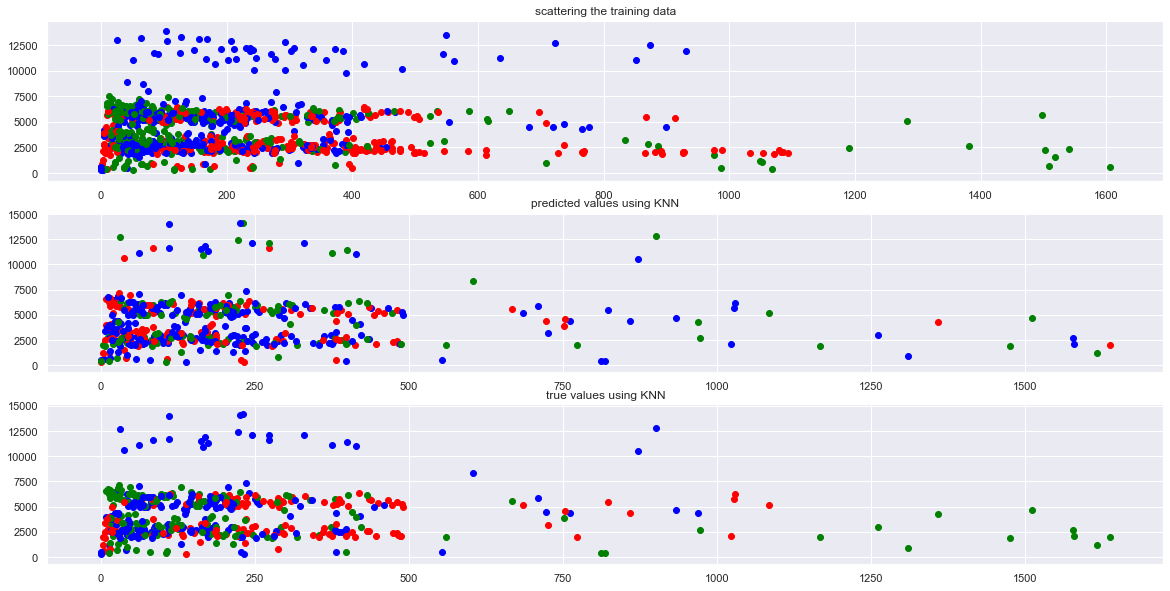

In [81]:
filename=r"C:\Users\chihe\datasets\Datasets\caracteristiques\new_Healthy\AC16.csv"
res,dict=read_files()

res=res.reshape(-1, 2)
print(res)
gmm = mixture.GaussianMixture(n_components=3).fit(res)
labels = gmm.predict(res)
"""
plt.figure()
plt.plot(res)
plt.title("Courbe des rapports des puissances")
plt.xlabel("données")
plt.ylabel("rap_puiss")
plt.savefig("rap_puiss_données.png")

plt.figure()
plt.hist(res)
plt.title("Histogramme des rapports des puissances")
plt.xlabel("données")
plt.ylabel("rap_puiss")
plt.savefig("hist.png")
"""
"""
plt.figure()
plt.scatter(res[:,0],res[:,1],c=(labels+5)*3)
plt.title("clustering using GMM")
plt.xlabel("rap_puiss")
plt.ylabel("duree du repos")
plt.savefig("GMM.png")
print(labels)
typ={"new_Healthy":{},"new_LMN_patients":{},"new_UMN_patients":{}}
for i in range(len(dict)):
    if (labels[i])not in typ[dict[i]]:
        typ[dict[i]][labels[i]]=0
    typ[dict[i]][labels[i]]+=1
print(typ)
kmeans = KMeans(3, random_state=0)
labels = kmeans.fit(res).predict(res)
plt.figure()
plt.scatter(res[:, 0], res[:, 1], c=labels, s=40, cmap='viridis');
plt.title("clustering using K-means")
plt.xlabel("rap_puiss")
plt.ylabel("duree du repos")
plt.savefig("K-means.png")
"""


#KNN
le=preprocessing.LabelEncoder()
y=le.fit_transform(dict)
X_train, X_test, y_train, y_test = train_test_split(res, y, test_size=0.33, random_state=42)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
predicted=model.predict(X_train)
print(predicted)
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
for i in range(len(X_train)):
    col=y_train[i]
    x1=X_train[i, 0]
    x2=X_train[i,1]
    if(col==0):
        plt.scatter(x1, x2,c="blue");
    if(col==1):
        plt.scatter(x1, x2,c="red");
    if(col==2):
        plt.scatter(x1, x2,c="green");
plt.title("scattering the training data")
plt.subplot(3,1,2)
for i in range(len(X_test)):
    col=predicted[i]
    x1=X_test[i, 0]
    x2=X_test[i,1]
    if(col==0):
        plt.scatter(x1, x2,c="blue");
    if(col==1):
        plt.scatter(x1, x2,c="red");
    if(col==2):
        plt.scatter(x1, x2,c="green");
plt.title("predicted values using KNN")
plt.subplot(3,1,3)
for i in range(len(X_test)):
    col=y_test[i]
    x1=X_test[i, 0]
    x2=X_test[i,1]
    if(col==0):
        plt.scatter(x1, x2,c="blue");
    if(col==1):
        plt.scatter(x1, x2,c="red");
    if(col==2):
        plt.scatter(x1, x2,c="green");
plt.title("true values using KNN")
plt.savefig("prediction using KNN.png")